In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

In [3]:
df = pd.read_html(url, header = 0)
df

[      Rk        Player Pos Age   Tm   G  GS  ...  TRB  AST  STL  BLK  TOV   PF   PTS
 0      1  Álex Abrines  SG  25  OKC  31   2  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
 1      2    Quincy Acy  PF  28  PHO  10   0  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
 2      3  Jaylen Adams  PG  22  ATL  34   1  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
 3      4  Steven Adams   C  25  OKC  80  80  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
 4      5   Bam Adebayo   C  21  MIA  82  28  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9
 ..   ...           ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...
 729  528  Tyler Zeller   C  29  MEM   4   1  ...  4.5  0.8  0.3  0.8  1.0  4.0  11.5
 730  529    Ante Žižić   C  22  CLE  59  25  ...  5.4  0.9  0.2  0.4  1.0  1.9   7.8
 731  530   Ivica Zubac   C  21  TOT  59  37  ...  6.1  1.1  0.2  0.9  1.2  2.3   8.9
 732  530   Ivica Zubac   C  21  LAL  33  12  ...  4.9  0.8  0.1  0.8  1.0  2.2   8.5
 733  530   Ivica Zubac   C  21  LAC  26  25  ...  7.7

In [4]:
len(df)

1

In [5]:
df=df[0]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [6]:
df.head() #let's predict...age! why not?

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      734 non-null    object
 1   Player  734 non-null    object
 2   Pos     734 non-null    object
 3   Age     734 non-null    object
 4   Tm      734 non-null    object
 5   G       734 non-null    object
 6   GS      734 non-null    object
 7   MP      734 non-null    object
 8   FG      734 non-null    object
 9   FGA     734 non-null    object
 10  FG%     728 non-null    object
 11  3P      734 non-null    object
 12  3PA     734 non-null    object
 13  3P%     687 non-null    object
 14  2P      734 non-null    object
 15  2PA     734 non-null    object
 16  2P%     719 non-null    object
 17  eFG%    728 non-null    object
 18  FT      734 non-null    object
 19  FTA     734 non-null    object
 20  FT%     691 non-null    object
 21  ORB     734 non-null    object
 22  DRB     734 non-null    ob

In [8]:
df.describe()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,734,734,734,734,734,734,734,734,734,734,728,734,734,687,734,734,719,728,734,734,691,734,734,734,734,734,734,734,734,734
unique,531,531,12,23,32,83,81,291,96,172,262,38,85,213,79,131,267,251,59,70,273,44,90,111,75,26,26,40,41,200
top,Rk,Player,SG,23,TOT,G,0,MP,FG,FGA,FG%,0.0,0.0,.000,0.0,2PA,2P%,.500,0.0,1.0,FT%,0.3,1.8,TRB,0.8,0.3,0.1,0.8,1.7,PTS
freq,26,26,175,75,86,26,199,26,26,26,26,118,56,56,30,26,26,32,52,46,26,81,26,26,40,93,121,59,46,26


In [9]:
df=df[ df['TOV'] != 'TOV' ]

In [10]:
len(df)

708

In [11]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [12]:
df.hist()

ValueError: ignored

In [13]:
df.info() #a lot of the features that should be numerical, just AREN'T!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      708 non-null    object
 1   Player  708 non-null    object
 2   Pos     708 non-null    object
 3   Age     708 non-null    object
 4   Tm      708 non-null    object
 5   G       708 non-null    object
 6   GS      708 non-null    object
 7   MP      708 non-null    object
 8   FG      708 non-null    object
 9   FGA     708 non-null    object
 10  FG%     702 non-null    object
 11  3P      708 non-null    object
 12  3PA     708 non-null    object
 13  3P%     661 non-null    object
 14  2P      708 non-null    object
 15  2PA     708 non-null    object
 16  2P%     693 non-null    object
 17  eFG%    702 non-null    object
 18  FT      708 non-null    object
 19  FTA     708 non-null    object
 20  FT%     665 non-null    object
 21  ORB     708 non-null    object
 22  DRB     708 non-null    ob

In [14]:
df['TOV'] = pd.to_numeric(df['TOV'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      708 non-null    object 
 1   Player  708 non-null    object 
 2   Pos     708 non-null    object 
 3   Age     708 non-null    object 
 4   Tm      708 non-null    object 
 5   G       708 non-null    object 
 6   GS      708 non-null    object 
 7   MP      708 non-null    object 
 8   FG      708 non-null    object 
 9   FGA     708 non-null    object 
 10  FG%     702 non-null    object 
 11  3P      708 non-null    object 
 12  3PA     708 non-null    object 
 13  3P%     661 non-null    object 
 14  2P      708 non-null    object 
 15  2PA     708 non-null    object 
 16  2P%     693 non-null    object 
 17  eFG%    702 non-null    object 
 18  FT      708 non-null    object 
 19  FTA     708 non-null    object 
 20  FT%     665 non-null    object 
 21  ORB     708 non-null    object 
 22  DR

In [16]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [17]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [18]:
df=df.drop('Player',axis=1)
df

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [19]:
df[['Rk','Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']] = df[['Rk','Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']].apply(pd.to_numeric)

In [20]:
df.info() #muuuucccchhhh bettterrr.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      708 non-null    int64  
 1   Pos     708 non-null    object 
 2   Age     708 non-null    int64  
 3   Tm      708 non-null    object 
 4   G       708 non-null    int64  
 5   GS      708 non-null    int64  
 6   MP      708 non-null    float64
 7   FG      708 non-null    float64
 8   FGA     708 non-null    float64
 9   FG%     702 non-null    float64
 10  3P      708 non-null    float64
 11  3PA     708 non-null    float64
 12  3P%     661 non-null    float64
 13  2P      708 non-null    float64
 14  2PA     708 non-null    float64
 15  2P%     693 non-null    float64
 16  eFG%    702 non-null    float64
 17  FT      708 non-null    float64
 18  FTA     708 non-null    float64
 19  FT%     665 non-null    float64
 20  ORB     708 non-null    float64
 21  DRB     708 non-null    float64
 22  TR

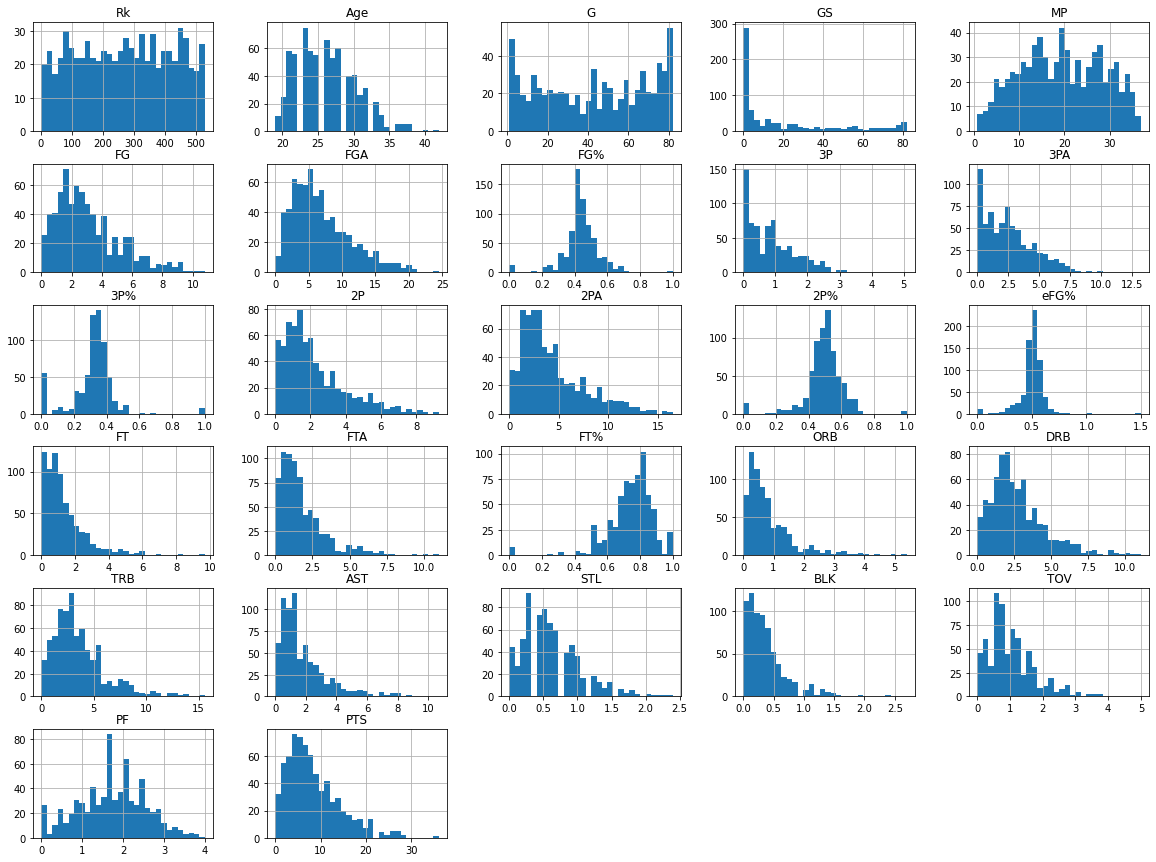

In [21]:
df.hist(bins=30,figsize=(20,15))
plt.show()

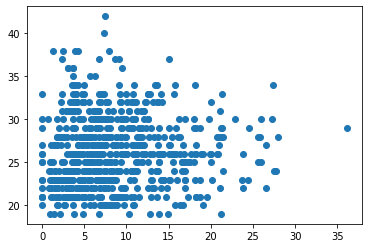

In [22]:
plt.scatter(x=df['PTS'],y=df['Age']) #there doesn't seem to be much of a correlation here..

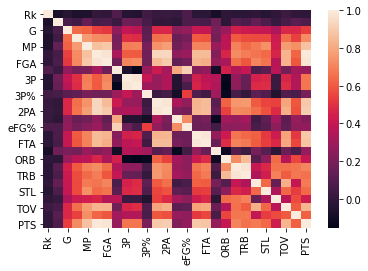

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix) #wowwwwwwww

In [24]:
corr_matrix['Age'].sort_values(ascending=False) #Hmm, there really isn't much correlation between anything and age. Maybe we should apply our data science techniques to other features instead..

Age     1.000000
FT%     0.168574
3P      0.166271
3PA     0.159218
MP      0.146543
AST     0.141556
PF      0.108226
DRB     0.103831
PTS     0.081915
STL     0.080757
FT      0.080174
eFG%    0.077733
FGA     0.073779
TRB     0.072544
G       0.067822
3P%     0.064435
TOV     0.063740
FTA     0.062099
FG      0.058213
GS      0.040582
FG%     0.025971
BLK     0.012428
2PA    -0.000322
2P     -0.002584
ORB    -0.016292
2P%    -0.018004
Rk     -0.071795
Name: Age, dtype: float64

In [25]:
corr_matrix['PF'].sort_values(ascending=False) #oooh. personal fouls seems interesting...let's try predicting that maybe! this shall be our y-var instead

PF      1.000000
MP      0.730804
TRB     0.673122
DRB     0.669048
FG      0.624156
PTS     0.612860
TOV     0.602627
2P      0.593860
FGA     0.591815
2PA     0.579835
BLK     0.563042
FTA     0.554915
ORB     0.551968
GS      0.537722
STL     0.528054
FT      0.521817
G       0.475785
AST     0.396177
3PA     0.353207
3P      0.353059
FG%     0.315008
2P%     0.279419
eFG%    0.262330
Age     0.108226
FT%     0.069583
3P%     0.069520
Rk     -0.001464
Name: PF, dtype: float64

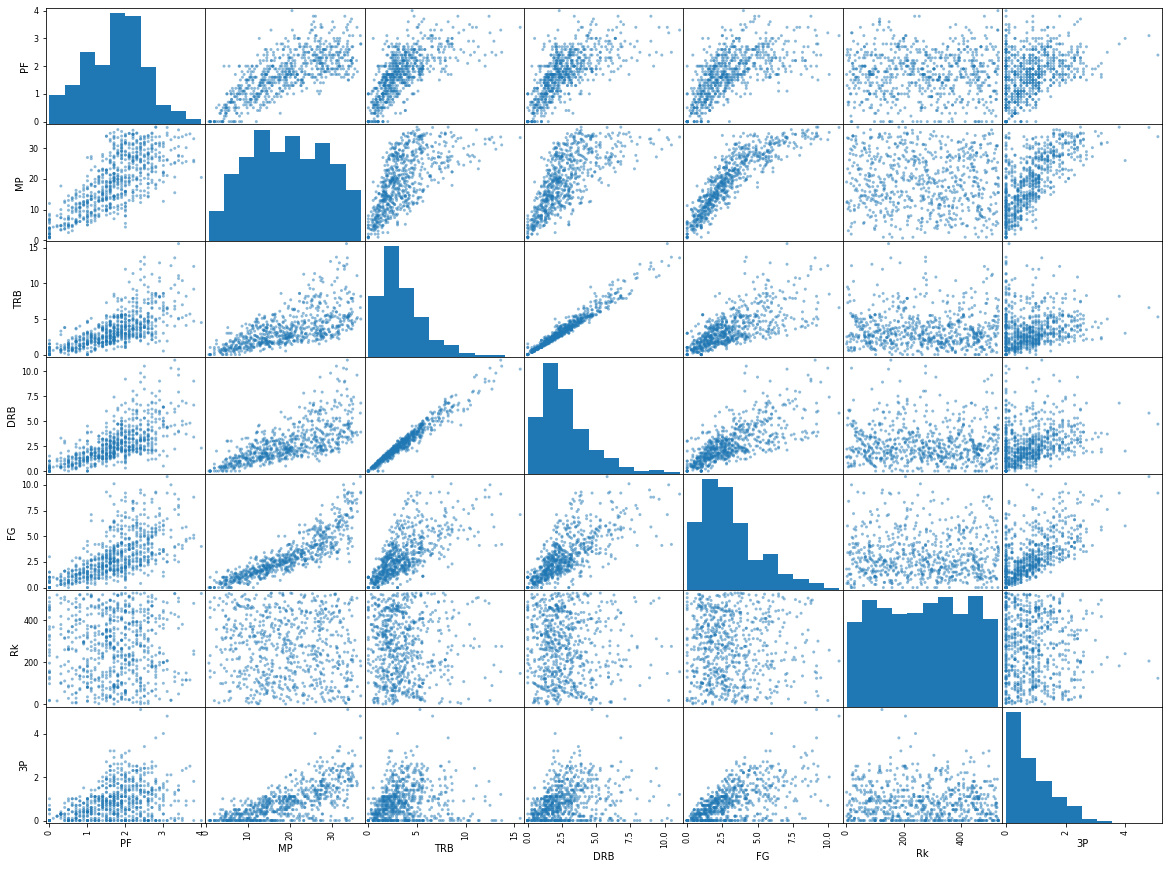

In [26]:
from pandas.plotting import scatter_matrix

attributes = ['PF','MP','TRB','DRB','FG','Rk','3P']
scatter_matrix(df[attributes],figsize=(20,15))

plt.show()

In [27]:
null_rows = df[df.isna().any(axis=1)].head()
null_rows

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
18,17,C,20,IND,3,0,2.0,0.0,1.0,0.000,0.0,0.0,NaN,0.0,1.0,0.000,0.000,0.0,0.0,NaN,0.3,0.7,1.0,0.3,0.0,0.3,0.3,0.0,0.0
20,19,PF,21,DAL,2,0,5.5,0.0,1.5,0.000,0.0,0.0,NaN,0.0,1.5,0.000,0.000,1.0,2.0,0.500,0.0,0.5,0.5,0.0,1.0,0.0,0.5,0.0,1.0
34,28,SG,25,WAS,4,0,11.3,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,1.0,1.0,0.5,0.3,0.3,0.5,0.5,0.0
56,47,SG,29,NOP,12,0,13.9,1.0,3.9,0.255,0.8,2.8,0.294,0.2,1.1,0.154,0.362,0.0,0.0,NaN,0.2,0.6,0.8,0.8,0.1,0.0,0.2,0.6,2.8
60,51,C,26,CHO,54,32,14.5,1.6,2.9,0.571,0.0,0.0,NaN,1.6,2.9,0.571,0.571,1.1,1.7,0.637,1.5,3.1,4.6,0.6,0.2,0.8,0.6,1.9,4.4


In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('mm_scaler', MinMaxScaler()),
])

In [29]:
X = df.drop('PF',axis=1)
y = df['PF'].copy()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [31]:
X_train_num = X_train.drop(['Pos','Tm'],axis=1)
X_train_cat = X_train[['Pos','Tm']]

In [32]:
X_train_num.head()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
396,290,20,63,46,20.5,3.2,7.1,0.450,0.9,2.9,0.315,2.3,4.2,0.543,0.514,1.1,1.5,0.783,0.9,3.0,3.9,0.8,0.7,0.4,1.2,8.5
331,247,33,4,0,3.8,0.0,1.5,0.000,0.0,0.8,0.000,0.0,0.8,0.000,0.000,0.0,0.0,NaN,0.3,0.3,0.5,0.0,0.3,0.0,0.3,0.0
488,356,20,73,0,17.2,3.1,8.0,0.387,1.5,4.5,0.330,1.6,3.5,0.461,0.480,1.2,1.4,0.882,0.2,1.7,1.9,1.6,0.5,0.3,1.2,8.9
608,442,34,50,2,12.2,1.4,3.0,0.477,0.7,1.6,0.436,0.7,1.4,0.521,0.591,0.3,0.4,0.636,0.2,2.3,2.5,0.5,0.9,0.1,0.5,3.8
473,345,21,29,0,5.0,0.7,2.0,0.328,0.0,0.1,0.000,0.7,1.9,0.339,0.328,0.4,0.6,0.765,0.3,0.9,1.2,0.4,0.2,0.1,0.5,1.8


In [33]:
X_train_cat.head()

,Pos,Tm
396,SF,BRK
331,SG,LAL
488,SG,CHO
608,SF,UTA
473,PF,SAS


In [34]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs),
])

In [35]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels)) 
#TESTING HOW WELL IT DOES ON DATA IT TRAINED ON

Predictions: [1.87988281 0.20214844 1.26171875 0.98339844 0.69433594]
Labels: [2.3, 0.0, 1.5, 0.8, 0.5]


In [38]:
from sklearn.metrics import mean_squared_error

y_train_pred = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train,y_train_pred)

lin_rmse = np.sqrt(lin_mse)
lin_rmse
#TESTING HOW WELL IT DOES ON DATA IT TRAINED ON

0.4097667651128312

In [39]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, y_train_pred)
lin_mae
#TESTING HOW WELL IT DOES ON DATA IT TRAINED ON

0.3233583860759494

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
y_train_pred = tree_reg.predict(X_train_prepared)
tree_mse = mean_squared_error(y_train, y_train_pred)

tree_rmse = np.sqrt(tree_mse)
tree_rmse
#TESTING HOW WELL IT DOES ON DATA IT TRAINED ON

6.912493450908137e-17

In [42]:
#Hmmm, our DecisionTreeRegressor performs very well on our training set. Is this because it's a good model? Or is it because of overfitting?

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [0.66598924 0.69221866 0.59843546 0.72972598 0.58908512 0.68974247
 0.60265371 0.76017915 0.73426762 0.69404764]
Mean: 0.6756345039030626
Standard deviation: 0.05761454308921378


In [45]:
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [2.25700283e+12 1.74248252e+12 4.85217524e-01 4.42589061e-01
 4.55598740e-01 4.53031745e-01 2.75396878e+10 5.46782876e-01
 5.11049914e-01 5.08676092e-01]
Mean: 402702503177.8739
Standard deviation: 806806820587.2264


In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
y_train_pred = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.17568624939888747

In [48]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.41073874 0.46272888 0.51077351 0.43586612 0.50990187 0.49138218
 0.48442267 0.47592608 0.47671395 0.45110102]
Mean: 0.4709555022371873
Standard deviation: 0.030129677932329183


In [49]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_prepared, y_train)
y_train_pred = svm_reg.predict(X_train_prepared)
svm_mse = mean_squared_error(y_train, y_train_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.4274568122468279

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [51]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [52]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6157284409562093 {'max_features': 2, 'n_estimators': 3}
0.5332684845326457 {'max_features': 2, 'n_estimators': 10}
0.501122393337588 {'max_features': 2, 'n_estimators': 30}
0.5863993545876766 {'max_features': 4, 'n_estimators': 3}
0.5155963224744335 {'max_features': 4, 'n_estimators': 10}
0.4911070113055202 {'max_features': 4, 'n_estimators': 30}
0.5506319059333359 {'max_features': 6, 'n_estimators': 3}
0.5046846586763337 {'max_features': 6, 'n_estimators': 10}
0.49092000839979666 {'max_features': 6, 'n_estimators': 30}
0.5412934338787824 {'max_features': 8, 'n_estimators': 3}
0.5062241579540674 {'max_features': 8, 'n_estimators': 10}
0.4857690523576439 {'max_features': 8, 'n_estimators': 30}
0.5559062001560199 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5189894673201467 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.601831843415717 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5148837788385707 {'bootstrap': False, 'max_features': 3, 'n_

In [54]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006099,0.000392,0.001136,0.000085,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.393485,-0.354620,-0.403626,-0.366713,-0.377163,-0.379122,0.017691,18,-8.054236e-02,-1.013984e-01,-8.065084e-02,-8.561419e-02,-9.559942e-02,-8.876104e-02,8.362911e-03
1,0.015398,0.000833,0.001460,0.000034,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.305143,-0.267642,-0.287517,-0.298218,-0.263356,-0.284375,0.016460,11,-4.720501e-02,-4.338786e-02,-4.745937e-02,-4.859472e-02,-5.405553e-02,-4.814050e-02,3.438619e-03
2,0.043931,0.000392,0.003041,0.000240,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.249236,-0.222799,-0.267279,-0.273681,-0.242624,-0.251124,0.018154,5,-4.139446e-02,-3.462838e-02,-3.927145e-02,-3.825878e-02,-3.385497e-02,-3.748161e-02,2.842933e-03
3,0.005728,0.000561,0.000911,0.000049,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.402035,-0.264877,-0.362936,-0.369532,-0.319941,-0.343864,0.047366,16,-8.223395e-02,-9.112577e-02,-7.754324e-02,-1.114717e-01,-8.227485e-02,-8.892990e-02,1.209741e-02
4,0.017441,0.002267,0.001490,0.000040,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.265905,-0.232316,-0.287877,-0.261705,-0.281395,-0.265840,0.019332,9,-4.983430e-02,-4.795884e-02,-4.504142e-02,-4.885119e-02,-4.932868e-02,-4.820289e-02,1.697270e-03
5,0.047183,0.000212,0.002828,0.000086,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.237893,-0.217957,-0.260840,-0.268490,-0.220751,-0.241186,0.020493,3,-3.569285e-02,-3.444960e-02,-3.772753e-02,-3.816045e-02,-3.307137e-02,-3.582036e-02,1.926939e-03
6,0.006026,0.000081,0.000954,0.000025,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.322749,-0.274655,-0.350573,-0.286807,-0.281194,-0.303195,0.028963,13,-6.715626e-02,-6.512167e-02,-9.347992e-02,-8.494283e-02,-8.640643e-02,-7.942142e-02,1.124131e-02
7,0.017825,0.000315,0.001531,0.000096,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.244386,-0.191161,-0.290443,-0.265405,-0.282137,-0.254707,0.035464,6,-4.811478e-02,-4.946464e-02,-4.472005e-02,-4.415752e-02,-4.714763e-02,-4.672092e-02,2.011339e-03
8,0.051261,0.000451,0.002813,0.000033,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.242679,-0.212722,-0.242465,-0.247369,-0.259777,-0.241002,0.015478,2,-3.574286e-02,-3.871668e-02,-3.646605e-02,-3.145588e-02,-3.765681e-02,-3.600766e-02,2.492287e-03
9,0.006303,0.000161,0.000945,0.000034,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.236865,-0.254409,-0.324865,-0.376749,-0.272104,-0.292999,0.051198,12,-9.341542e-02,-7.169452e-02,-7.513339e-02,-7.505424e-02,-7.600877e-02,-7.826127e-02,7.718976e-03


In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.48431212165378323 {'max_features': 7, 'n_estimators': 180}
0.5083667456082406 {'max_features': 5, 'n_estimators': 15}
0.48761622516027214 {'max_features': 3, 'n_estimators': 72}
0.5065066740181562 {'max_features': 5, 'n_estimators': 21}
0.4836961982990584 {'max_features': 7, 'n_estimators': 122}
0.4908208268869707 {'max_features': 3, 'n_estimators': 75}
0.4899480811758307 {'max_features': 3, 'n_estimators': 88}
0.4891780307142612 {'max_features': 5, 'n_estimators': 100}
0.48964425763706665 {'max_features': 3, 'n_estimators': 150}
0.6126789338012628 {'max_features': 5, 'n_estimators': 2}


In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.67909969e-02, 1.32538464e-02, 1.30388004e-02, 4.90031882e-02,
       1.25749881e-01, 5.06190794e-02, 2.97914660e-02, 1.75814344e-02,
       1.18861799e-02, 1.17878460e-02, 1.11836583e-02, 3.06761374e-02,
       3.92582344e-02, 1.17171390e-02, 1.57608423e-02, 1.35334164e-02,
       4.09670523e-02, 1.74017248e-02, 5.33479310e-02, 7.50341778e-02,
       5.57538277e-02, 5.30885823e-02, 1.52855952e-02, 5.63873342e-02,
       5.47917797e-02, 7.72062191e-02, 4.72243757e-03, 0.00000000e+00,
       1.92574132e-03, 4.34597023e-05, 8.11486651e-05, 2.71879915e-03,
       1.31235991e-03, 0.00000000e+00, 1.27664258e-03, 5.18499504e-07,
       1.99996878e-05, 1.30852751e-03, 3.71264249e-04, 7.81645226e-04,
       1.11679857e-03, 9.58687080e-04, 8.76244209e-04, 4.63961728e-04,
       6.17242833e-04, 2.97807665e-04, 7.00273705e-04, 1.00952635e-03,
       2.64894917e-05, 2.14825697e-03, 4.34985471e-04, 2.82421963e-03,
       1.71023523e-04, 1.06569243e-03, 7.37626220e-04, 7.12305565e-04,
      

In [58]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

0.46527856231596054

In [60]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.40858044, 0.51578126])

In [61]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(some_data)

array([1.87988281, 0.20214844, 1.26171875, 0.98339844, 0.69433594])

In [65]:
my_model = full_pipeline_with_predictor

In [66]:
import joblib
joblib.dump(my_model, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")